# Reinforcement Learning :

## Pre-Lab : Value Iteration (VI)

- Implement the V.I algorithm with the Bellman Equation 
$$ V^{\pi}(s) = R(s) + \gamma \sum_{s'} P_{s\pi(s)}(s')V^{\pi}(s') $$

- V.I algorithm, for each state compute : 
$$ V(S) = R(S) + \gamma\max_a \sum_{S'} Psa(S')V(s') $$

In [2]:
# library pythons :
import random
import numpy as np
import seaborn as sns
from tkinter import *

In [3]:
# Init the map of 11 cells
S = [(0,0), (0,1), (0,2), (0,3),
     (1,0),        (1,2), (1,3),
     (2,0), (2,1), (2,2), (2,3) ]

# All possible transitions
S__ = {(0,0): [(0,0), (0,1), (1,0)],
       (1,0): [(1,0), (0,0), (2,0)],
       (2,0): [(2,0), (1,0), (2,1)],
       (0,1): [(0,0), (0,1), (0,2)],
       (0,2): [(0,1), (0,2), (0,3), (1,2)],
       (2,3): [(2,2), (2,3), (1,3)],
       (2,2): [(2,1), (2,2), (2,3), (1,2)],
       (2,1): [(2,0), (2,1), (2,2)],
       (1,2): [(0,2), (1,2), (2,2), (1,3)],
       (1,3): [(1,3)],
       (0,3): [(0,3)]}


# Init the V matrix
V = np.zeros((3,4))

# Init the Action set
A = ['N', 'S', 'E', 'W']

# State transition distribution
def Psa(s, a, s_prime):
    prob_N = np.array([[0.0, 0.8, 0.0],
                       [0.1, 0.0, 0.1],
                       [0.0, 0.0, 0.0]])
    
    prob_S = np.array([[0.0, 0.0, 0.0],
                       [0.1, 0.0, 0.1],
                       [0.0, 0.8, 0.0]])
    
    prob_E = np.array([[0.0, 0.1, 0.0],
                       [0.0, 0.0, 0.8],
                       [0.0, 0.1, 0.0]])
    
    prob_W = np.array([[0.0, 0.1, 0.0],
                       [0.8, 0.0, 0.0],
                       [0.0, 0.1, 0.0]])
    i = s_prime[0] - s[0] + 1
    j = s_prime[1] - s[1] + 1
    
    # 
    if (a == 'N'):
        return prob_N[i][j]
    elif (a == 'S'):
        return prob_S[i][j]
    elif (a == 'E'):
        return prob_E[i][j]
    elif (a == 'W'):
        return prob_W[i][j]
    
    
# Reward function
def R(s):
    if (s == (0,3)):
        return 1
    elif (s == (1,3)):
        return -1
    else:
        return -0.02
    
# The discount factor
gamma = 0.99

### Test of the Value Iteration

In [4]:
i = 0
iterations = 1000

while i < iterations:
    for state in S:
        max_actions = list()
        for action in A:
            s = 0
            for s_next in S__.get(state):
                s += Psa(state, action, s_next) * V[s_next[0], s_next[1]]
            max_actions.append(s)
        V[state[0], state[1]] = R(state) + gamma * max(max_actions)
    i += 1

### The Optimal Value :
$$ V \to V^* $$

In [5]:
V

array([[ 0.5204131 ,  0.63331887,  0.82489757,  1.        ],
       [ 0.39216717,  0.        ,  0.53431887, -1.        ],
       [ 0.32482867,  0.34578052,  0.46184409,  0.24678052]])

### The Optimal Policy :
$$ \Pi^* = \argmax_{a} \sum_{S'} Psa(S')V^*(S')$$

In [6]:
# Optimal Policy
PI = [['p', 'p', 'p', 'p'],
      ['p', 'p', 'p', 'p'],
      ['p', 'p', 'p', 'p']]

for state in S:
    max_actions2 = list()
    for action in A:
        s = 0
        for s_next in S__.get(state):
            s += Psa(state, action, s_next) * V[s_next[0], s_next[1]]
        max_actions2.append(s)
    PI[state[0]][state[1]] = A[np.argmax(max_actions2)]

<AxesSubplot:>

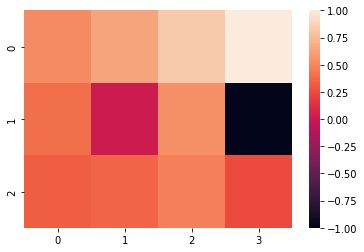

In [7]:
sns.heatmap(V)

### Visualization :

In [9]:
def create_arrow(c, a, pX, pY):
    if (a == 'N'):
        c.create_line([(50+pX,25+pY), (50+pX,75+pY)], fill="black")
        c.create_line([(50+pX,25+pY), (25+pX,50+pY)], fill="black")
        c.create_line([(50+pX,25+pY), (75+pX,50+pY)], fill="black")
    elif (a == 'S'):
        c.create_line([(50+pX,25+pY), (50+pX,75+pY)], fill="black")
        c.create_line([(50+pX,75+pY), (25+pX,50+pY)], fill="black")
        c.create_line([(50+pX,75+pY), (75+pX,50+pY)], fill="black")
    elif (a == 'W'):
        c.create_line([(25+pX,50+pY), (75+pX,50+pY)], fill="black")
        c.create_line([(25+pX,50+pY), (50+pX,25+pY)], fill="black")
        c.create_line([(25+pX,50+pY), (50+pX,75+pY)], fill="black")
    elif (a == 'E'):
        c.create_line([(25+pX,50+pY), (75+pX,50+pY)], fill="black")
        c.create_line([(75+pX,50+pY), (50+pX,25+pY)], fill="black")
        c.create_line([(75+pX,50+pY), (50+pX,75+pY)], fill="black")

In [11]:
#
window = Tk()


# Canvas
canvas = Canvas(window, width=400, height=300, background='white')

#
w = 400
h = 300
pX = 0
pY = 0

#
for i in range(0, w+100, 100):
    canvas.create_line([(i, 0), (i, h)], fill="black")
    
for j in range(0, h+100, 100):
    canvas.create_line([(0, j), (w, j)], fill="black")
    
#
for i in range(3):
    pY = 100 * i
    for j in range(4):
        pX = 100 * j 
        if (PI[i][j] == 'p'):
            canvas.create_rectangle(200,200,100,100, fill="black")
        elif (i == 0 and j == 3):
            canvas.create_rectangle(400,100,300,0, fill="green")
        elif (i == 1 and j == 3):
            canvas.create_rectangle(400,200,300,100, fill="red")
        else:
            create_arrow(canvas, PI[i][j], pX, pY)

#
canvas.pack()

#
window.mainloop()

## Lab : Policy Iteration and Q-Learning :

### Functions :

In [20]:
# obtains (S_t+1, r_t) from (S_t, a_t)
def calculus(s_t, a_t):
    # forbidden moves
    if (s_t[0] == 2) and a_t == 'S':
        return (s_t, R(s_t))
    elif (s_t[0] == 0) and a_t == 'N':
        return (s_t, R(s_t))
    elif (s_t[1] == 0) and a_t == 'W':
        return (s_t, R(s_t))
    elif (s_t[1] == 3) and a_t == 'E':
        return (s_t, R(s_t))
    else:
        # get s_t+1
        prob = list()
        states = list()
        for s_next in S__.get(s_t):
            prob.append(Psa(s_t, a_t, s_next)) # * qTable[S.index(s_next),A.index(a_t)])
            states.append(s_next)
        return (states[np.argmax(prob)], R(states[np.argmax(prob)]))


#
def selectNewAction(currentState, e, qTable):
    """
    Chooses a new action according to the epsilon-greedy selection method.
    """
    # Choose a random action with probability epsilon.
    if random.random() < e:
        return random.randint(0, 3)
    # With probability 1-epsilon, choose the action corresponding to the maximum reward.
    else:
        stateIndex = S.index(currentState)
        maxQValue = max(qTable[stateIndex])
        # If multiple actions give the maximum value, we randomly choose one of those maximum actions.
        maxIndexes = []
        for i in range(4):
            if qTable[stateIndex][i] == maxQValue:
                maxIndexes.append(i)
        return maxIndexes[random.randint(0, len(maxIndexes) - 1)]
    
def playRound(state, action, qTable, alpha):
    """
    Updates the Q-Table.
    And make the next state
    """
    # Compute the next state s+1
    (S_t_prime, r_t) = calculus(state, action)
    
    # indexes of Q
    index_i = S.index(state)
    index_j = A.index(action)
        
    # Bellman equation
    stateIndex = S.index(S_t_prime)
    qTable[index_i, index_j] = ((1 - alpha) * qTable[index_i, index_j]) + alpha * (r_t + (gamma*max(qTable[stateIndex])))
    
    return S_t_prime

In [31]:
# Init the Q matrix :
Q = np.zeros((11,4))

### Test of Q-learning algorithm :

In [32]:
# Parameters :
iterations = 2000
i = 0
epsilon = 0.1
alpha = 0.02

# algorithm :
while i < iterations:
    S_0 = random.choice(S)
    while (S_0 != (0, 3) and S_0 != (1, 3)):
        
        # Take a new action
        new_action = A[selectNewAction(S_0, epsilon, Q)]
        # Move to the next state and update the Q-table
        S_0 = playRound(S_0, new_action, Q, alpha)
        
    i += 1

### Optimal Q :

In [33]:
Q

array([[ 0.09002123,  0.09535825,  0.93923223,  0.16262049],
       [ 0.14936367,  0.2544454 ,  0.96999423,  0.15205409],
       [ 0.47100999,  0.57710393,  1.        ,  0.56012748],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.84027417,  0.00805161,  0.03695877,  0.07555059],
       [ 0.96999996,  0.29639626, -0.34574419,  0.36378655],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.0516614 ,  0.04181905,  0.80918201,  0.01434457],
       [ 0.04408353,  0.11310364,  0.90822188,  0.07155445],
       [ 0.94029468,  0.1978928 ,  0.15654984,  0.15832965],
       [-0.14923698,  0.08190376,  0.02024618,  0.85971711]])

### Get Optimal Policy :

In [34]:
# Optimal Policy
PI_2 = [['p', 'p', 'p', 'p'],
        ['p', 'p', 'p', 'p'],
        ['p', 'p', 'p', 'p']]


for state in S:
    k = S.index(state)
    PI_2[state[0]][state[1]] = A[np.argmax(Q[k,:])]

#
PI_2[0][3] = "+1"
PI_2[1][3] = "-1"

In [35]:
#
window = Tk()


# Canvas
canvas = Canvas(window, width=400, height=300, background='white')

#
w = 400
h = 300
pX = 0
pY = 0

#
for i in range(0, w+100, 100):
    canvas.create_line([(i, 0), (i, h)], fill="black")
    
for j in range(0, h+100, 100):
    canvas.create_line([(0, j), (w, j)], fill="black")
    
#
for i in range(3):
    pY = 100 * i
    for j in range(4):
        pX = 100 * j 
        if (PI_2[i][j] == 'p'):
            canvas.create_rectangle(200,200,100,100, fill="black")
        elif (i == 0 and j == 3):
            canvas.create_rectangle(400,100,300,0, fill="green")
        elif (i == 1 and j == 3):
            canvas.create_rectangle(400,200,300,100, fill="red")
        else:
            create_arrow(canvas, PI_2[i][j], pX, pY)

#
canvas.pack()

#
window.mainloop()